In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

0.048067475246044766


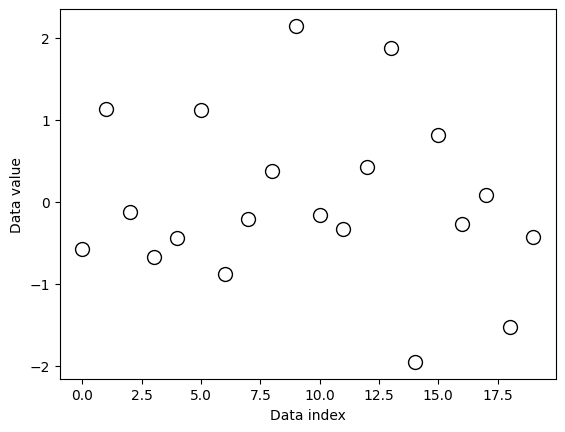

In [4]:
## generate the data

#parameters
N=20 #sample size
popMu = .5 # true population mean
data = np.random.randn(N)+popMu # randn은 평균이 0인 정규분포를 생성한다. 이 코드만 따로 평균값을 구하면 실제로는 0이 아닌데, 이는 샘플의 수가 작기 때문. 많은 수를 뽑으면 0에 수렴한다.
print(np.random.randn(N).mean())

# let's see what the edata look(s) like
plt.plot(data,'ko',markerfacecolor='w',markersize=10)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.show()

### question : should there be lines in this plot? 이 플롯에 선이 있어야 할까?
## 그렇지 않다. x축의 여 점들 간에는 본질적인 관계가 없기 때문에, 즉, 선을 연결하면 포인트와 포인트 사이에는 값들이 있을것처럼 보이지만 실제로는 존재하 않기 때문에

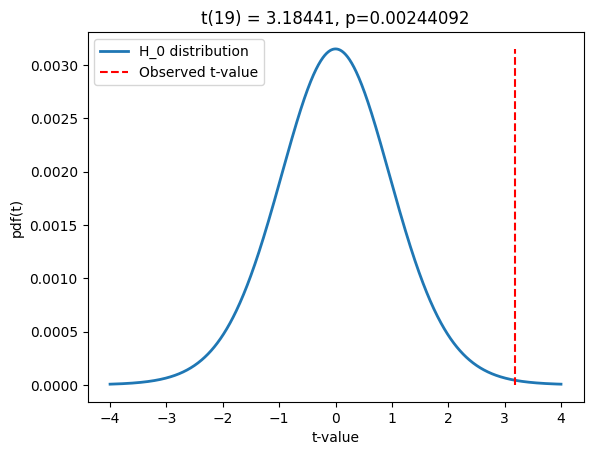

In [14]:
# menual t-test

# the null-hypothesis value
H0val=0

# compute the t-value
t_num = np.mean(data) - H0val
t_den = dnp.std(data,ddof=1)/np.sqrt(N) # 기본 자유도는 0이므로, 1로 설정한다.
tval = t_num/t_den

# degrees of freedom
df =N-1

# p-value
pval = 1-stats.t.cdf(abs(tval),df) # t-value를 이용해 p-value를 끌어냄

#show the H0 parameter distribution and observed t-value
x = np.linspace(-4,4,1001)
tdist = stats.t.pdf(x,df) * np.mean(np.diff(x))

plt.plot(x,tdist,linewidth=2)
plt.plot([tval,tval],[0,max(tdist)],'r--')
plt.legend(('H_0 distribution','Observed t-value'))
plt.xlabel('t-value')
plt.ylabel('pdf(t)')
plt.title('t(%g) = %g, p=%g'%(df,tval,pval))
plt.show()

In [11]:
## now using the  Python function

t,p = stats.ttest_1samp(data,H0val)
print(t,p/2)

1.6649205207032578 0.056166354536225885


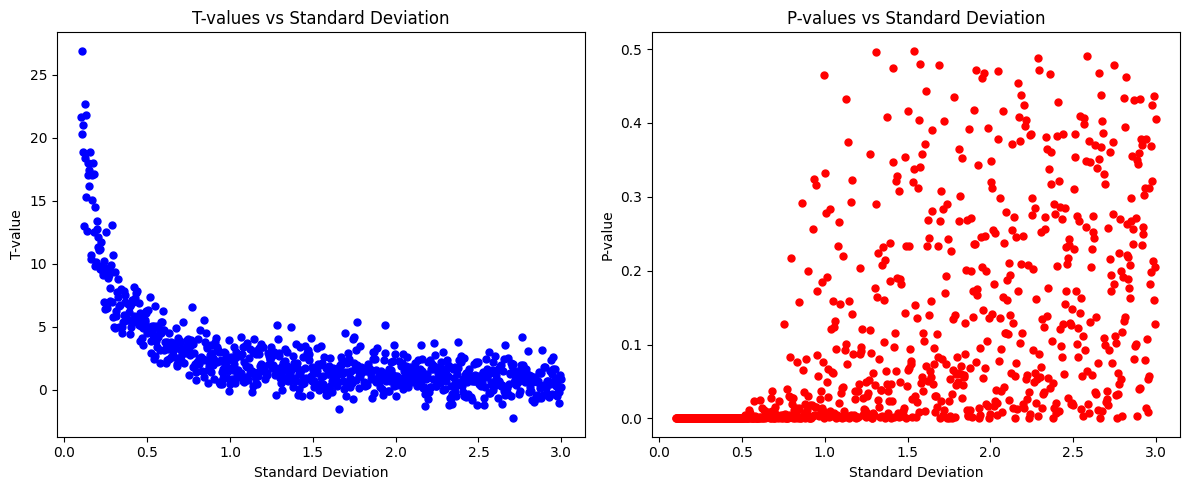

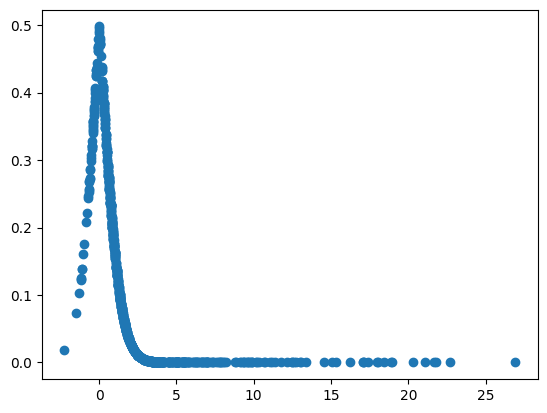

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# 초기 파라미터 설정
N = 20  # sample size
popMu = 0.5  # true population mean
std_devs = np.linspace(0.1, 3, 800)  # 표준편차를 0.1에서 3까지 30단계로 나눔

# t-값과 p-값을 저장할 리스트
t_values = []
p_values = []

# 시뮬레이션 시작
for std in std_devs:
    # 표준편차를 조절한 데이터 생성
    data = np.random.randn(N) * std + popMu  
    
    # ttest_1samp 함수를 사용하여 t-값과 p-값 계산
    tval, pval = stats.ttest_1samp(data, 0)
    
    # 양측 검정 결과를 단측으로 변환 (p-값을 절반으로 나눔)
    pval /= 2  # 단측 검정 시 p-값을 나눔
    
    # t-값과 p-값 저장
    t_values.append(tval)
    p_values.append(pval)

# t-값과 p-값을 그래프로 시각화
plt.figure(figsize=(12, 5))

# t-값 그래프
plt.subplot(1, 2, 1)
plt.plot(std_devs, t_values, 'bo', markersize=5)
plt.title("T-values vs Standard Deviation")
plt.xlabel("Standard Deviation")
plt.ylabel("T-value")

# p-값 그래프
plt.subplot(1, 2, 2)
plt.plot(std_devs, p_values, 'ro', markersize=5)
plt.title("P-values vs Standard Deviation")
plt.xlabel("Standard Deviation")
plt.ylabel("P-value")

plt.tight_layout()
plt.show()

plt.plot(t_values,p_values,'o')

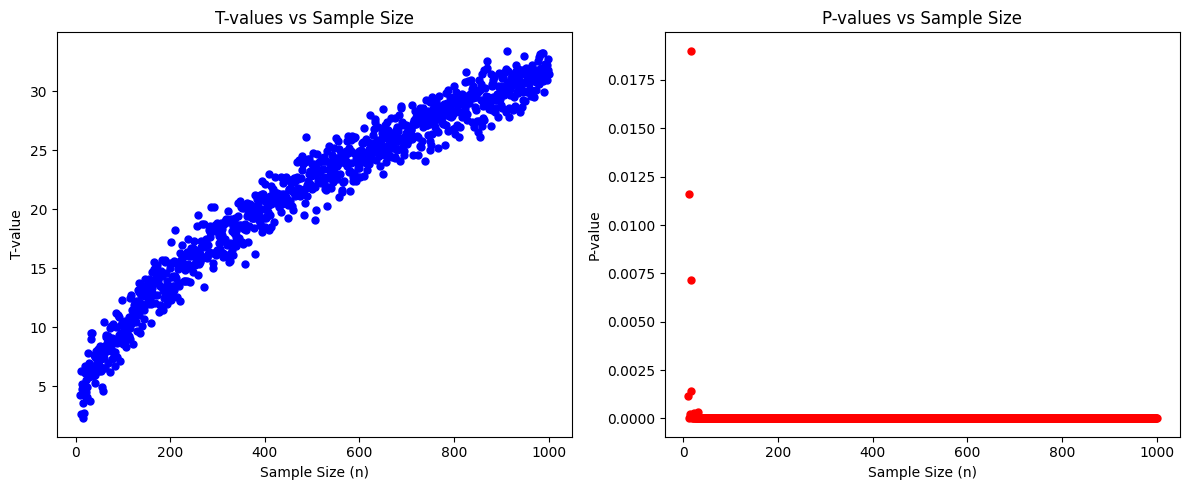

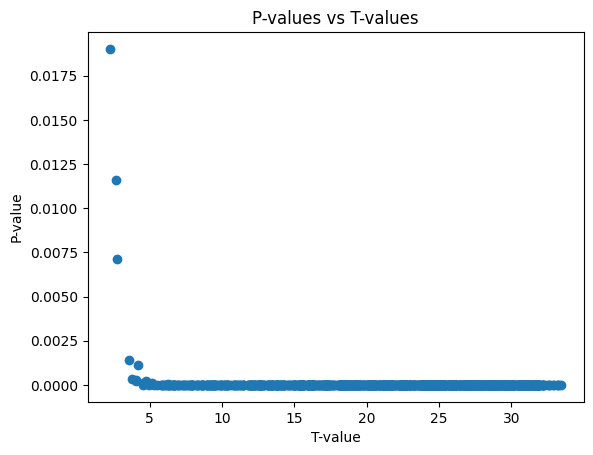

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# 초기 파라미터 설정
popMu = 0.5  # true population mean
std = 0.5  # 고정된 표준편차
n_sizes = np.arange(10, 1001)  # 10에서 100까지의 표본 크기(n) 단계적으로 나눔

# t-값과 p-값을 저장할 리스트
t_values = []
p_values = []

# 시뮬레이션 시작
for n in n_sizes:
    # 표본 크기에 맞춰 데이터를 생성
    data = np.random.randn(n) * std + popMu  
    
    # ttest_1samp 함수를 사용하여 t-값과 p-값 계산
    tval, pval = stats.ttest_1samp(data, 0)
    
    # 양측 검정 결과를 단측으로 변환 (p-값을 절반으로 나눔)
    pval /= 2  # 단측 검정 시 p-값을 나눔
    
    # t-값과 p-값 저장
    t_values.append(tval)
    p_values.append(pval)

# t-값과 p-값을 그래프로 시각화
plt.figure(figsize=(12, 5))

# t-값 그래프
plt.subplot(1, 2, 1)
plt.plot(n_sizes, t_values, 'bo', markersize=5)
plt.title("T-values vs Sample Size")
plt.xlabel("Sample Size (n)")
plt.ylabel("T-value")

# p-값 그래프
plt.subplot(1, 2, 2)
plt.plot(n_sizes, p_values, 'ro', markersize=5)
plt.title("P-values vs Sample Size")
plt.xlabel("Sample Size (n)")
plt.ylabel("P-value")

plt.tight_layout()
plt.show()

# t-값과 p-값의 관계를 그래프로 표현
plt.figure()
plt.plot(t_values, p_values, 'o')
plt.title("P-values vs T-values")
plt.xlabel("T-value")
plt.ylabel("P-value")
plt.show()

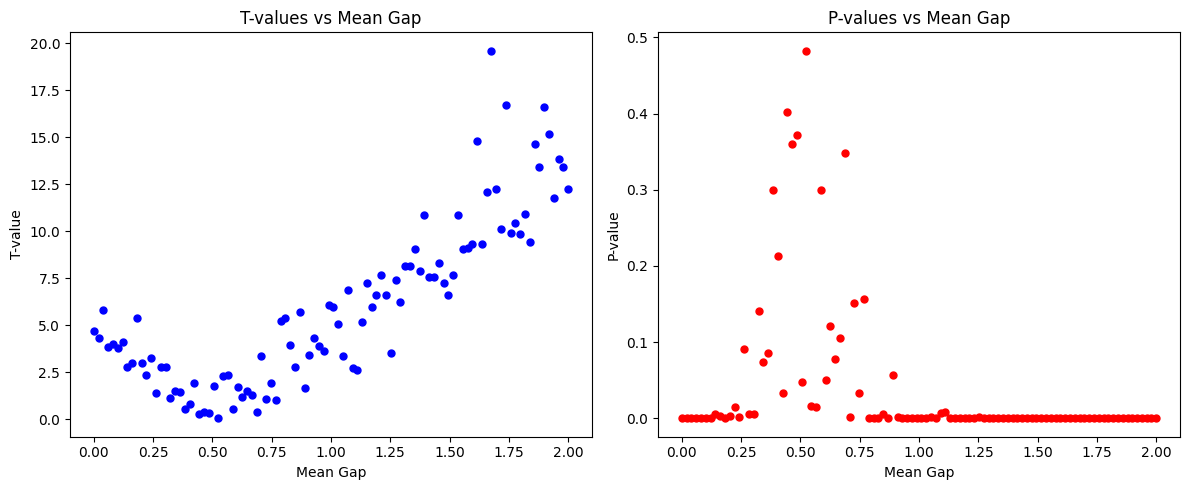

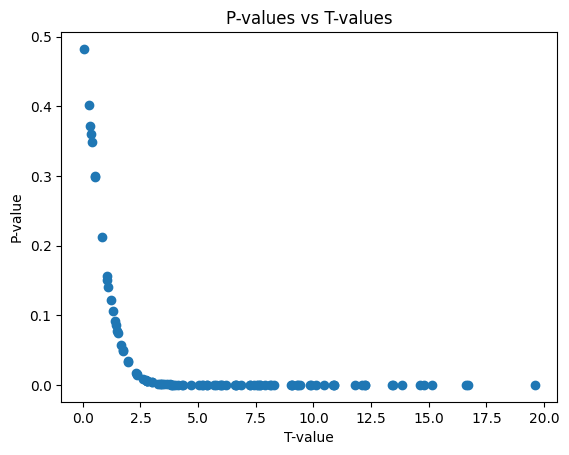

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# 초기 파라미터 설정
N = 20  # sample size
popMu = 0.5  # true population mean
std = 0.5  # 고정된 표준편차
mean_gap = np.linspace(0, 2, 100) # 0에서 2까지 100단계로 나눔

# t-값과 p-값을 저장할 리스트
t_values = []
p_values = []

# 시뮬레이션 시작
for m in mean_gap:
    # 표본 크기에 맞춰 데이터를 생성
    data = np.random.randn(N) * std + popMu  
    
    # ttest_1samp 함수를 사용하여 t-값과 p-값 계산
    tval, pval = stats.ttest_1samp(data, m)
    
    # 양측 검정 결과를 단측으로 변환 (p-값을 절반으로 나눔)
    pval /= 2  # 단측 검정 시 p-값을 나눔
    
    # t-값과 p-값 저장
    t_values.append(abs(tval))
    p_values.append(pval)

# t-값과 p-값을 그래프로 시각화
plt.figure(figsize=(12, 5))

# t-값 그래프
plt.subplot(1, 2, 1)
plt.plot(mean_gap, t_values, 'bo', markersize=5)
plt.title("T-values vs Mean Gap")
plt.xlabel("Mean Gap")
plt.ylabel("T-value")

# p-값 그래프
plt.subplot(1, 2, 2)
plt.plot(mean_gap, p_values, 'ro', markersize=5)
plt.title("P-values vs Mean Gap")
plt.xlabel("Mean Gap")
plt.ylabel("P-value")

plt.tight_layout()
plt.show()

# t-값과 p-값의 관계를 그래프로 표현
plt.figure()
plt.plot(t_values, p_values, 'o')
plt.title("P-values vs T-values")
plt.xlabel("T-value")
plt.ylabel("P-value")
plt.show()